In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# My modules
from generator import Generator

In [2]:
gen = Generator(12345)

In [3]:
n1 = 10
n2 = 1000
start = 0
end = 100
random_doubles = np.array([gen.next_double_from_to(end=end) for _ in range(0, n1)])

random_doubles_big_numbers = np.array([gen.next_double_from_to(end=end) for _ in range(0, n2)])

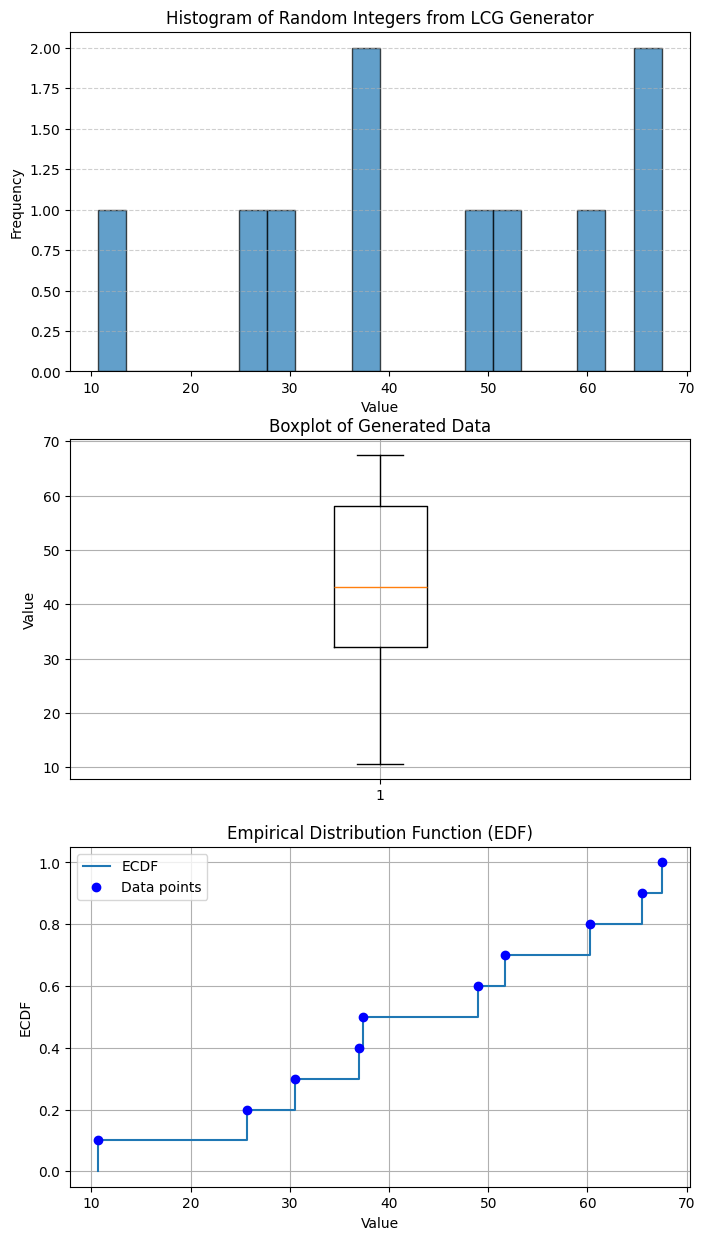

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# 1. Histogram
axs[0].hist(random_doubles, bins=20, edgecolor='black', alpha=0.7)
axs[0].set_title("Histogram of Random Integers from LCG Generator")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# 2. Boxplot
axs[1].boxplot(random_doubles, vert=True)
axs[1].set_title("Boxplot of Generated Data")
axs[1].set_ylabel("Value")
axs[1].grid(True)

# 3. Empirical Distribution Function (ECDF)
ecdf = ECDF(random_doubles)
axs[2].step(ecdf.x, ecdf.y, where='post', label='ECDF')
axs[2].plot(ecdf.x, ecdf.y, 'o', markerfacecolor='blue', markeredgecolor='blue', label='Data points')
axs[2].set_title("Empirical Distribution Function (EDF)")
axs[2].set_xlabel("Value")
axs[2].set_ylabel("ECDF")
axs[2].grid(True)
axs[2].legend()
plt.show()

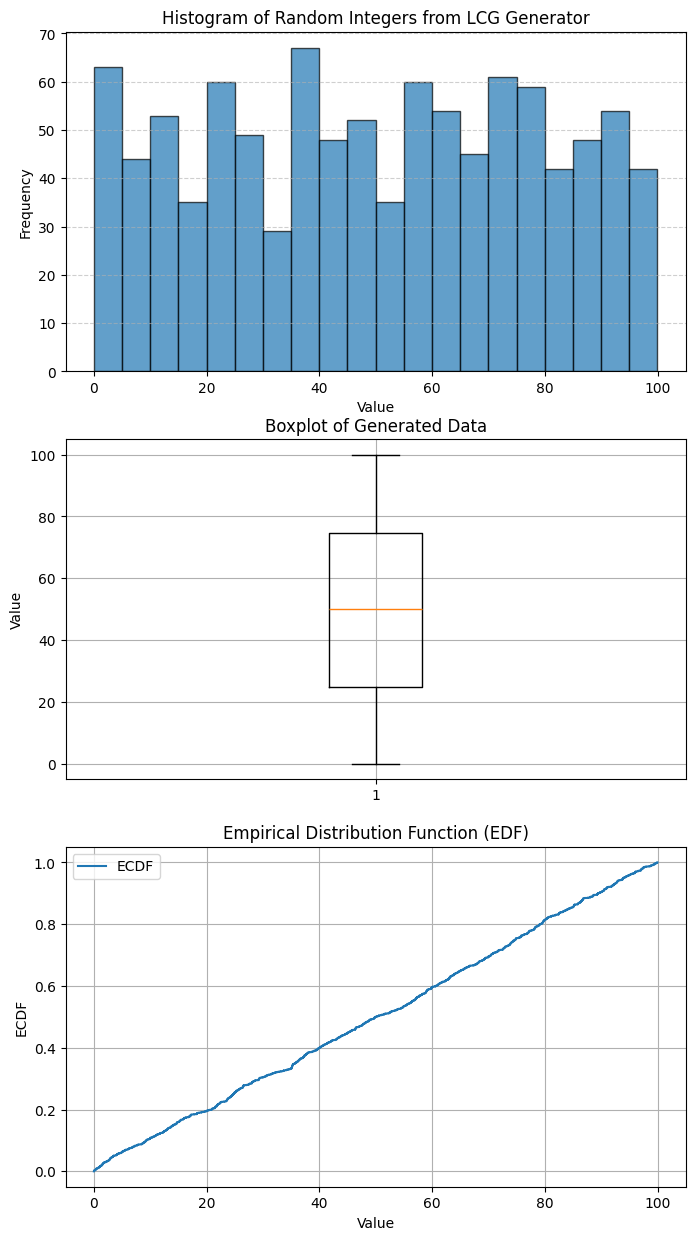

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# 1. Histogram
axs[0].hist(random_doubles_big_numbers, bins=20, edgecolor='black', alpha=0.7)
axs[0].set_title("Histogram of Random Integers from LCG Generator")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# 2. Boxplot
axs[1].boxplot(random_doubles_big_numbers, vert=True)
axs[1].set_title("Boxplot of Generated Data")
axs[1].set_ylabel("Value")
axs[1].grid(True)

# 3. Empirical Distribution Function (ECDF)
ecdf = ECDF(random_doubles_big_numbers)
axs[2].step(ecdf.x, ecdf.y, where='post', label='ECDF')
axs[2].set_title("Empirical Distribution Function (EDF)")
axs[2].set_xlabel("Value")
axs[2].set_ylabel("ECDF")
axs[2].grid(True)
axs[2].legend()
plt.show()

# Analysis of distribution

Now let's analyze the distribution of the generated random doubles.

## Method of Moments(MoM)

Using the first-moment being the expected value $\mathbb{E}X$ the MoM works like this: 

$$ 
\mathbb{E}X = \hat{X}_n \\
\operatorname{Var}(X) = \hat{S}_n
$$

in case of Uniform distribution that we use in method next_double_from_to the:

$$
\mathbb{E}X = \frac{a + b}{2} \\
\operatorname{Var}(X) = \frac{(b - a)^2}{12}
$$

we set equations

$$
\frac{\hat{a} + \hat{b}}{2} = \hat{X}_n \\
\frac{(\hat{b} - \hat{a})^2}{12} = \hat{S}_n
$$

by solving for $\hat{a}$ and $\hat{b}$ we obtain

$$
\hat{a} = \hat{X}_n - \sqrt{3\hat{S}_n} \\
\hat{b} = \hat{X}_n + \sqrt{3\hat{S}_n}
$$

our expectations are

$$
\hat{a} = 0 \\
\hat{b} = 100
$$

In [6]:
X_hat1 = random_doubles.mean()
S_hat1 = random_doubles.var()
X_hat2 = random_doubles_big_numbers.mean()
S_hat2 = random_doubles_big_numbers.var()

a_hat1 = X_hat1 - math.sqrt(3 * S_hat1)
b_hat1 = X_hat1 + math.sqrt(3 * S_hat1)
a_hat2 = X_hat2 - math.sqrt(3 * S_hat2)
b_hat2 = X_hat2 + math.sqrt(3 * S_hat2)

print('Parameters for small number of values generated')
print('a_hat =', a_hat1)
print('b_hat =', b_hat1)
print('\nParameters for big number of values generated')
print('a_hat =', a_hat2)
print('b_hat =', b_hat2)

Parameters for small number of values generated
a_hat = 13.107125763907408
b_hat = 73.91716413652959

Parameters for big number of values generated
a_hat = -0.13796599557608857
b_hat = 99.86379244191556


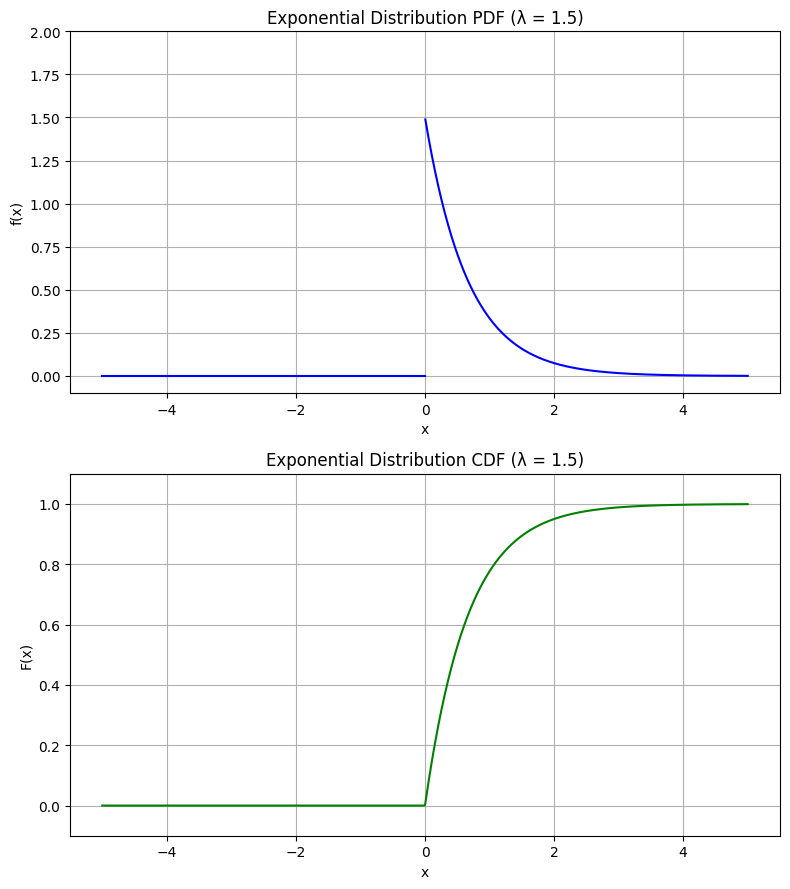

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def f_exp(x, lmbda):
    y = np.zeros_like(x)
    mask = x >= 0
    y[mask] = lmbda * np.exp(-lmbda * x[mask])
    return y

def F_exp(x, lmbda):
    y = np.zeros_like(x)
    mask = x >= 0
    y[mask] = 1 - np.exp(-lmbda * x[mask])
    return y

# Define x values
x = np.linspace(-5, 5, 1000)
y = f_exp(x, 1.5)
Fy = F_exp(x, 1.5)

# Split values for PDF to avoid line jump at x = 0
x_neg = x[x < 0]
y_neg = y[x < 0]
x_pos = x[x >= 0]
y_pos = y[x >= 0]

# Plot in two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 9))

# PDF
axs[0].plot(x_neg, y_neg, color='blue')
axs[0].plot(x_pos, y_pos, color='blue')
axs[0].set_ylim(-0.1, 2)
axs[0].set_title("Exponential Distribution PDF (λ = 1.5)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].grid(True)

# CDF
axs[1].plot(x, Fy, color='green')
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_title("Exponential Distribution CDF (λ = 1.5)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("F(x)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Generating values from exponential distribution

Now we are going to generate values from exponential distribution using the Generator object.

In [11]:
random_exp_values = np.array([gen.next_from_exp(1.5) for _ in range(0, n2)])

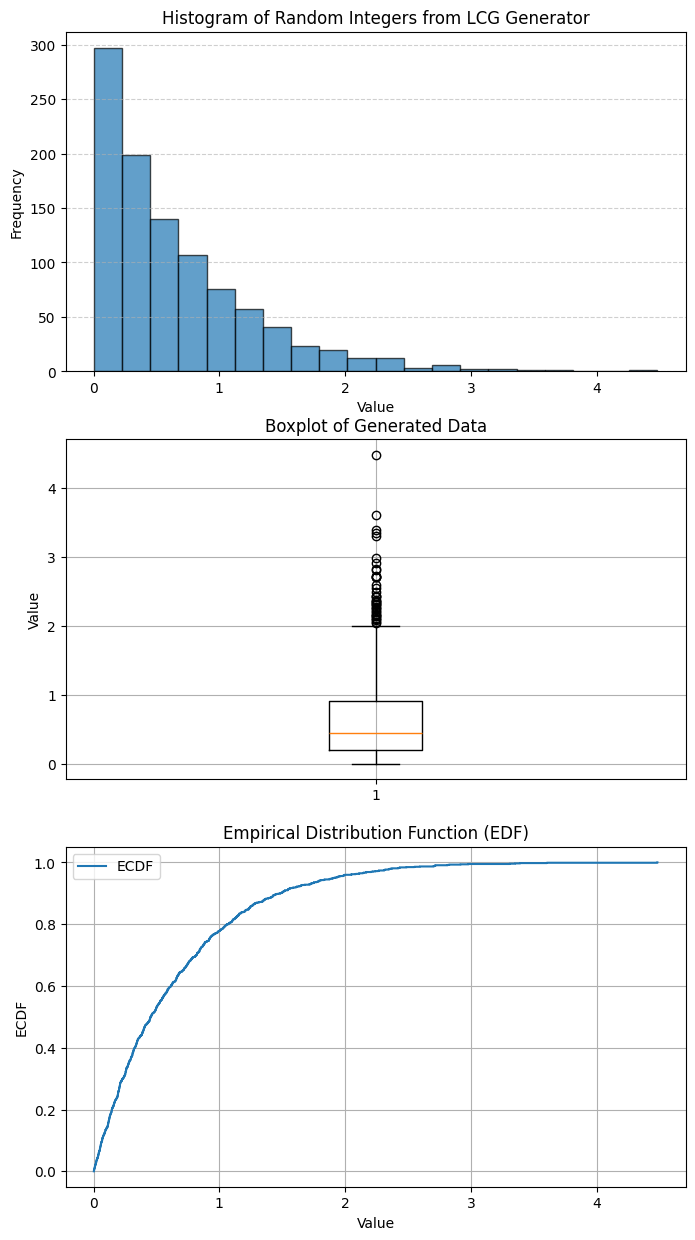

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# 1. Histogram
axs[0].hist(random_exp_values, bins=20, edgecolor='black', alpha=0.7)
axs[0].set_title("Histogram of Random Integers from LCG Generator")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# 2. Boxplot
axs[1].boxplot(random_exp_values, vert=True)
axs[1].set_title("Boxplot of Generated Data")
axs[1].set_ylabel("Value")
axs[1].grid(True)

# 3. Empirical Distribution Function (ECDF)
ecdf = ECDF(random_exp_values)
axs[2].step(ecdf.x, ecdf.y, where='post', label='ECDF')
axs[2].set_title("Empirical Distribution Function (EDF)")
axs[2].set_xlabel("Value")
axs[2].set_ylabel("ECDF")
axs[2].grid(True)
axs[2].legend()
plt.show()

## Method of Moments (MoM) for Exponential Distribution

Let \( X \sim \text{Exp}(\lambda) \).

We know the moments of the exponential distribution:

$$
\mathbb{E}X = \frac{1}{\lambda}, \quad
\operatorname{Var}(X) = \frac{1}{\lambda^2}
$$

From the sample, we estimate:

$$
\mathbb{E}X \approx \bar{X}_n, \quad
\operatorname{Var}(X) \approx S_n^2
$$

So the method of moments estimator for \( \lambda \) is:

$$
\hat{\lambda}_{\text{MoM}} = \frac{1}{\bar{X}_n}
$$

or (less commonly, based on the variance):

$$
\hat{\lambda}_{\text{MoM}} = \frac{1}{\sqrt{S_n^2}}
$$

The expectation is for the $\hat{\lambda}$ to be 1.5

In [32]:
lmbda1 = 1 / random_exp_values.mean()
lmbda2 = 1 / math.sqrt(random_exp_values.var())

print('lambda calculated from expected value =', lmbda1)
print('lambda calculated from variance =', lmbda2)

lambda calculated from expected value = 1.53773963899348
lambda calculated from variance = 1.5699181823078714


## Maximum Likelihood Estimation (MLE)

We define Maximum Likelihood Estimation for the single-parameter case \( \theta \).

### Discrete case:

$$
\begin{aligned}
1. \quad & \mathcal{L}(\theta) = \prod_{i=1}^{n} P_\theta(X = x_i) \\
2. \quad & \ell(\theta) = \sum_{i=1}^{n} \log\left(P_\theta(X = x_i)\right) \\
3. \quad & \frac{\partial \ell(\theta)}{\partial \theta} = 0 \\
4. \quad & \hat{\theta} \text{ is the solution}
\end{aligned}
$$

## Continuous case:

$$
\begin{aligned}
1. \quad & \mathcal{L}(\theta) = \prod_{i=1}^{n} f_\theta(x_i) \\
2. \quad & \ell(\theta) = \sum_{i=1}^{n} \log\left(f_\theta(x_i)\right) \\
3. \quad & \frac{\partial \ell(\theta)}{\partial \theta} = 0 \\
4. \quad & \hat{\theta} \text{ is the solution}
\end{aligned}
$$

We will use the **continuous case** to analyze values generated from the exponential distribution, since it is a continuous distribution.

In the case of the exponential distribution, both the **Method of Moments** and the **Maximum Likelihood Estimation** lead to the **same estimator**:

$$
\hat{\lambda} = \frac{1}{\bar{X}}
$$

This happens because the exponential distribution has only one parameter and its first moment (mean) uniquely determines the distribution.
